<a href="https://colab.research.google.com/github/maytanti/titanic-logistic-regression/blob/main/Titanic_Survival_Classification_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Survival Classification Using Logistic Regression**

Link to the dataset can be found [here](https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing). The dataset analyzed is the [RMS Titanic](https://en.wikipedia.org/wiki/RMS_Titanic).

Goal: to classify survivability based on the various factors of the passengers. 

For this problem, we will choose the factors listed below:

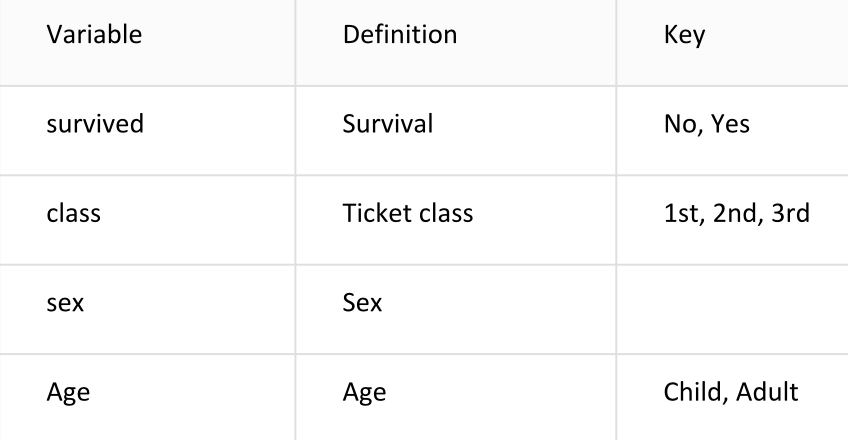

In [ ]:
#Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

   Passenger Class   Sex    Age Survived
0          1   3rd  Male  Child       No
1          2   3rd  Male  Child       No
2          3   3rd  Male  Child       No
3          4   3rd  Male  Child       No
4          5   3rd  Male  Child       No
Class       0
Sex         0
Survived    0
dtype: int64


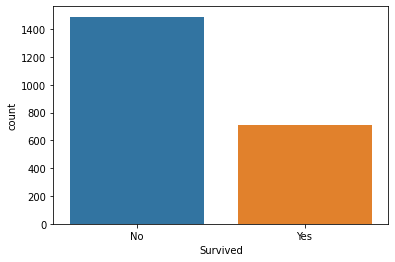

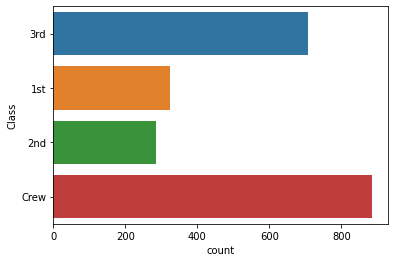

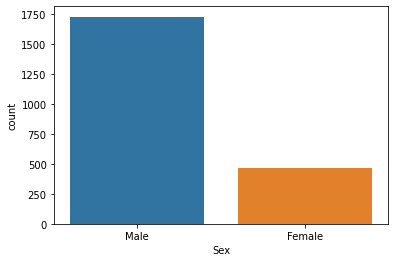

In [ ]:
#Read the dataset into a dataframe. Display the first 5 rows of the dataframe.
df = pd.read_csv('Titanic.csv')
print(df.head())

#Explore the dataset and determine what is the target variable.
#The target variable is 'Survived'

#Drop factor(s) that are not likely to be relevant for logistic regression.
df = df.drop(['Passenger', 'Age'],axis=1)
#Dropped age column because the code provided for predict in Q12 indicates that only class and gender columns exist

#Make sure there are no missing values. Handle missing values if any.
print(df.isnull().sum())
#There seems to be no missing data

#Plot count plots of each of the remaining factors (including the target variable).
plt.figure(1)
sb.countplot(x='Survived', data=df)
plt.figure(2)
sb.countplot(y='Class', data=df)
plt.figure(3)
sb.countplot(x='Sex', data=df)
plt.show()


In [ ]:
pd.set_option('display.max_columns', None)

#Convert all categorical feature variables into dummy variables.
df2 = pd.get_dummies(df, columns=['Class', 'Sex'])
print(df2.head())

#Partition the data into train and test sets (70/30). Use random_state = 2020.
X = df2.iloc[:, 1:]
y = df2.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


  Survived  Class_1st  Class_2nd  Class_3rd  Class_Crew  Sex_Female  Sex_Male
0       No          0          0          1           0           0         1
1       No          0          0          1           0           0         1
2       No          0          0          1           0           0         1
3       No          0          0          1           0           0         1
4       No          0          0          1           0           0         1
(1540, 6)
(1540,)
(661, 6)
(661,)


Accuracy Score:
0.7700453857791225


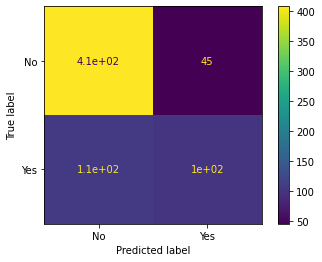

Exact Count:
[[408  45]
 [107 101]]
Outcome: ['No']
Probability Split of Survivial (No/Yes): [[0.87214287 0.12785713]]


In [ ]:
#Fit the training data to a logistic regression model.
model = LogisticRegression()
model.fit(X_train, y_train)

#Predict the outcomes for the test set.
y_pred = model.predict(X_test)

#Display the accuracy of your predictions for survivability.
print('Accuracy Score:')
print(metrics.accuracy_score(y_test, y_pred))

#Display the confusion matrix along with the labels (Yes, No). Hint: You may want to use from sklearn.metrics import plot_confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()
print("Exact Count:")
print(cnf_matrix)

#Now, display the predicted value of the survivability of a male adult passenger traveling in 3 rd class.
x_new = [[0,0,1,0,0,1]]        #Age was dropped for this code to work
y_new = model.predict(x_new)
print("Outcome:", y_new)

#Next, display the predicted probability of the survivability of a male adult passenger traveling in 3 rd class.
print("Probability Split of Survivial (No/Yes):", model.predict_proba(x_new))
